## 強化学習

長期的に報酬を最大化できるように環境の中で最適な行動をとることができるエージェントを作ることが目標の機械学習の分野。計算速度の進展により大規模な状態を持つ強化学習が可能になり進歩している分野。

エージェントの行動の結果として与えらえれる報酬（利益）をもとに行動を決定していく原理を改善していく。

#### 強化学習と教師あり、なし学習との違い
教師あり、なし学習ではデータに含まれるパターンを見つけ、そのデータから予測することが目標\
強化学習では、優れた方策を見つけることが目標（報酬を最大化する）

### 強化学習のイメージ
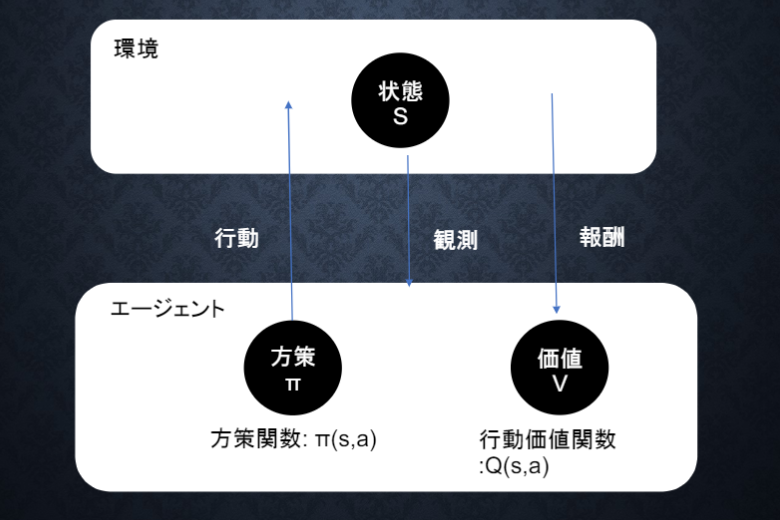

上記のイメージの方策関数$\pi(s,a)$と行動価値関数$Q(s,a)$を学習する。\
関数近似法とQ学習を組み合わせる手法の登場で急速に発展している。

Q学習：行動価値関数を行動のたびに更新することで学習を進める手法\
関数近似法：価値関数や方策関数を関数近似する手法のこと。ニューラルネットワークを用いる

### 価値関数

価値を表す関数で状態価値関数と行動価値関数の2種類がある。\
Q学習と組み合わせて用いられるのは行動価値関数。

状態価値関数：ある状態の価値に注目する\
行動価値関数：状態と価値を組み合わせた価値に注目する

### 方策関数

エージェントがある状態でどのような行動をとるのかの確率を与える関数。
この関数の結果をもとに、エージェントは行動をとる。

エージェントの行動は方策関数$\pi(s)=a$で決められる。その瞬間での坑道をどうするのかを決める。
状態関数$V^{\pi}(s)$は状態$s$の関数。行動価値関数$Q^{\pi}(s.a)$は状態$s$とエージェントの行動$a$の関数となっており、どちらもゴール（最後）まで今の方策を続けた場合の報酬の予測が得られる。
今の方策を続けた場合に最終的にどうなるかの予測値を得る。


### 方策勾配法

方策関数の学習方法\
方策反復法:方策をモデル化して最適化する手法\
⇒方策勾配法
$$
 \theta^{t+1} = \theta^{t} + \epsilon \nabla J (\theta)
$$

$\theta$は方策関数のパラメータ。$J(\theta)$は方策の良さを表す関数で定義する必要がある。
NNでは$J$に当たるのは誤差関数だったが、強化学習では期待収益となる。NNでは誤差関数を最小を目指したが、強化学習では期待収益を大きくしたい。そのため式の第二項はプラスになっている

$$
 \nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta} [(\nabla_\theta \log \pi_\theta(a|s) Q^\pi (s,a))]
$$

## Alpha Go

強化学習を用いた囲碁のプログラム。AlphaGo(Lee)とAlphaGo Zeroがある。

### ALphaGo Lee

PolicyNetとValueNetのふたつのニューラルネットワークからなる。
- policyNet\
盤面の特徴を入力（19×19, 48channel)し、19マス×19マスの着手予想確率が出食される。強化学習の方策関数


- ValueNet\
盤面の特徴を入力（19×19, 49channel)し、現局面の勝率を$-1～1$で表したものが出力される。強化学習の価値関数


- RollOutPolicy\
NNではなく線形の方策関数。高速で着手確率を出力するために使われる。

### 学習のステップ

1.教師有り学習によるRollOutPolicyとPolicyNetの学習

⇒3000万局分の棋譜データを教師データとし、教師と同じ着手を予測できるように学習を行う。
この学習でのPolicyNetの精度は57%程度


2.強化学習によるPolicyNetの学習

⇒現状のPolicyNetとPolicyPoolからランダムに選択されたPolicyNetと対局シミュレーションを行い、その結果から方策勾配法で学習を行う。PolicyNet同士の対局ではなく、PolicyPoolに保存しているものとの対局を使用することで、対局に幅を持たせて、過学習を防ぐ狙いがある。

※PolicyPool：PolicyNetの強化学習の過程を500iterationごとに記録したもの。

3.強化学習によるValueNetの学習

⇒PolicyNetを使用して対局シミュレーションを行い、その結果の勝敗を教師として学習。\
【学習手順】
1. 教師あり学習で作成したPolicyNetでN手まで打つ。
2. N+1手目をランダムで選択し、その手で進めた局面をS（N+1）とする。
3. S(N+1）から強化学習で作成したPolicyNetで終局まで打ち、勝敗報酬をRとする

S(N+1)とRを教師データ対とし、回帰問題として学習する（損失関数は平均二乗誤差）

### モンテカルロ木探索

コンピュータ囲碁ソフトでは最も有効と考えられている探索法。
盤面の価値に頼らず、末端評価値（勝敗）のみを使って探索を行う探索法。
囲碁の場合、最大手数はマスの数でほぼ限定されているため、末端局面に到達しやすい。現局面から末端局面までPlayOutと呼ばれるランダムシミュレーションを多数回行い、勝敗を集計して着手の優劣を決める。

該当手のシミュレーション回数が一定回数以上になるとその手以降の局面をシミュレーション開始点となるように探索木を成長させる。

### AlphaGo Zero

#### AlphaGo Leeとの違い

1. 教師有り学習を行わず、強化学習のみで作成
2. 特徴入力を石の配置のみにした。
3. PolicyNetとValueNetを一つのネットワークに統合
4. ResidualNetを導入した
5. モンテカルロ木探索からRollOutシミュレーションをなくした

#### Residual Net

ネットワークにショートカット構造を追加して、勾配爆発、消失を抑える効果を狙ったもの。100層を超えるネットワークで安定した学習が可能となった。

## 軽量化・高速化技術

### データ並列化

深層学習においては多くのデータを使用して、パラメータ調整に多くの時間を使用するため高速に計算できる環境が必要。複数の計算資源を使用して並列的にニューラルネットを構成することで、効率的に学習を行う。


親モデルを各子ワーカーに子モデルとしてコピーし、データをそれぞれの子ワーカーに計算させる。
データの並列化には同期型と非同期型の二種類がある。

【同期型】\
各子ワーカーに別々のデータを渡し、勾配を計算させる。それぞれの勾配の平均を親モデルに戻し、パラメータを更新する。更新後のモデルを再度子ワーカーにコピーしそれを繰り返す。各子ワーカーの計算を同期させる方法

【非同期型】\
各子ワーカーは互いの計算を待たずに、子モデルごとに更新を行い、パラメータサーバに更新後のパラメータをPushする。
次に各子ワーカーはパラメータサーバからPopしたモデルを子モデルとして学習を進める。

処理スピードは非同期型のほうが早いが、最新のパラメータを利用できないため、学習が不安定になりやすい。\
現在では、同期型の方が精度が良い場合が多いので主流となっている。

### モデル並列化

親のモデルを各ワーカに分割し、それぞれ学習を行いすべてのデータ学習が終わったのち一つのモデルに復元する。モデルのパラメータが多いほど効率も向上する。

### GPUによる高速化

CPU
- 高性能なコアが少数あり、複雑で連続的な処理が得意

GPU
- 比較的低性能なコアが多数。簡単な並列処理が得意。NNの学習では単純な行列計算を多数行うため、GPUによる高速化が可能。

### モデル軽量化

モデルの精度を維持しつつ、パラメータ数や演算回数を提言する手法の総称\
モバイル、IOT機器上に実装するには軽量化が必須となっている。

- 量子化\
パラメータの精度を64bit浮動小数点を32bitなどの下位精度に落とすことで、メモリと演算処理の削減を行う。
デメリットとして、精度が低下する可能性が考えられるが、実際の問題ではほとんど変わらない。


- 蒸留\
精度の高いモデルはニューロンの規模が大きいモデルになっている。
規模の大きなモデルの知識を用いて、軽量なモデルを作ること。
利点として、少ない学習回数で精度のよいモデルを作ることができる。


- プルーニング\
大きなネットワーク上のパラメータはすべてが精度に寄与しているわけではない。
モデルの精度に寄与の少ないニューロンを削除することでモデルの軽量化、高速化を図る手法。

## 応用技術

### MobileNet

画像認識タスクに用いられるディープラーニングモデルは多くの計算リソースが必要なため、軽量化、高速化、高精度化を実現したネットワーク。

一般的なCNNの畳み込み層は計算量が多いため、MobileNetsでは
Depthwise ConvolutionとPointwise Convolutionを組み合わせることで軽量化を実現している。

### DenseNet

CNNのアーキテクチャの一種。NNでは層が深くなるにつれて学習が難しくなる問題があったが、ResNetなどのCNNでは前層から後層へのアイデンティティ接続を介してパスを作ることで問題に対処している。DenseNetも同様の構造を持っており、DenseBlockと呼ばれるモジュールを用いる。

## Transformer

### Seq2seq

系列（Sequence）を入力して系列を出力するモデル。
Encoder-Decoderから構成される。
Encoderで入力を内部状態に変換し、Decoderで内部状態を出力に変換する。
実用例として翻訳や音声認識、チャットボットなどがある。

Encoder,DecoderともにRNNを利用している。
EncoderのRNNではDecoderに渡すための内部状態ベクトルを生成する。
言語モデルを再現するようにRNNの重みを学習することで次の単語を確率的に予測することができる。つまり、先頭の単語を与えることで文章を生成することも可能になる。

### Transformer

Seq2Seqでは翻訳元の文章を一つのベクトルで表現していた（Encoderの出力する内部状態ベクトル）。文章が長くなると表現力が足りなくなることが問題であった。
そこで、翻訳元の各単語の隠れ状態も利用する（Attention）ことで文章の長さにも対応できるようになった。TransoformerではRNNを使わずにAttention機構だけを利用する。

## 物体検知・セグメンテーション

画像分類のタスクには大きく4つある。

- Classification(分類)


- Object Detection(物体検知）\
⇒出力はBounding Box


- Semantic Segmentation\
⇒出力は各ピクセルに対して単一のクラスラベル


- Instance Segmentation\
⇒出力は各ピクセルに対して単一のクラスラベル

### Object Detection

出力はBoundingBoxとクラスラベルであり、画像のどの位置にそのラベルの対象物が移っているかを推定することが評価の対象となる。

### IOU
BBの出力位置に関する評価指標（物体位置の予測精度を評価する指標）

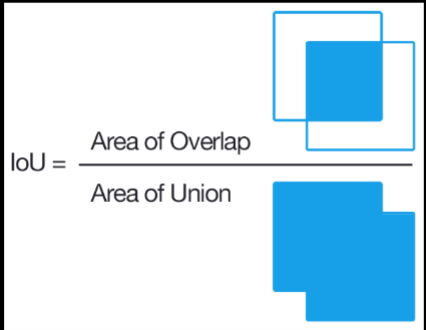

### AP(Average Precision)

各出力の確度の閾値を変えることで、Precision-Recall曲線を描くことができる。
このPR曲線の下側面積をAPと呼ぶ。

$$
 AP = \int_{0}^{1} P(R) dR
$$

### mAP(Mean average Precision)
クラス数で算術平均をとったAPのこと。通常のAPはクラスラベルごとに計算されている。

$$
 mAP = \frac{1}{C} \sum_{i=1}^{C} AP_i
$$


### セマンティックセグメンテーション

画像に移っている物体をピクセル単位でラベルを予測する物体検知の手法。
画像のピクセルに対して予測を行うので、出力は入力画像と同じサイズになる。
通常のCNNでは畳み込み,poolingを行うにつれてサイズが小さくなっていくため、Un-poolingすることで、元の画像サイズまで戻す処理を行う必要がある。

#### un-poolingの手法
- Deconvolution/Transposed convolution\
kernel size, apdding, strideを指定。
各特徴マップの間隔をstride分だけ空け、周りを(kernel size - 1) - paddingだけ余白を作って、畳み込み演算を行う。\
逆畳み込みと呼ばれることもあるが、畳み込み時にPoolingされ、失われた情報が復元されるわけではない。